# End-to-end Multi-class Dog Breed Classification

This notebook builds an end-ton-end multi-class image classifier using TensorFlow 2.0 and TensorFlow Hub.

## 1. Problem

Identifying the breed of a dog given an image of a dog.

## 2. Data

The data we're using is from Kaggle's dog breed identification competition.

https://www.kaggle.com/c/dog-breed-identification/data

## 3. Evaluation

The evaluation is a file with prediction probabilities for each dog breed of each test image.

https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

## 4. Features

Some information about the data:

* We're dealing with images (unstructured data) so it's probably best we use deep learning/transfer learning.
* There are 120 breeds of dogs (this means there are 120 different classes).
* There are around 10,000+ images in the training set (these images have labels)
* There are around 10,000+ images in the test set (these images have no labels, because we'll want to predict them.)

In [ ]:
# Unzip the uploaded zip file with all the images for this project

!unzip "path to your data" -d 'where do you want it unziped'

### Get our workspace ready

* Import TensorFlow 2.x
* Import TensorFlow Hub
* Make sure we're using a GPU

In [ ]:
# Import necessary tools into Colab

import tensorflow as tf
import tensorflow_hub as hub
print("TF version:", tf.__version__)
print("TF Hub version:", hub.__version__)

# Check for GPU availability
print("GPU", 'available (yes)' if tf.config.list_physical_devices("GPU") else 'not available')

TF version: 2.4.1
TF Hub version: 0.11.0
GPU available (yes)


## Getting our data ready (turning into Tensors)

With all machine learning models, our data has to be in numerical format. So that's what we'll be doing first. Turning our images into Tensors (numerical representations).

Let's start by accessin our data and checking out the labels.

In [ ]:
# Checkout the labels of our data

import pandas as pd
labels_csv = pd.read_csv('path to the labels')
print(labels_csv.describe())
labels_csv.head()

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     1ea7adfd17a58475b764cc95431e2315  scottish_deerhound
freq                                   1                 126


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


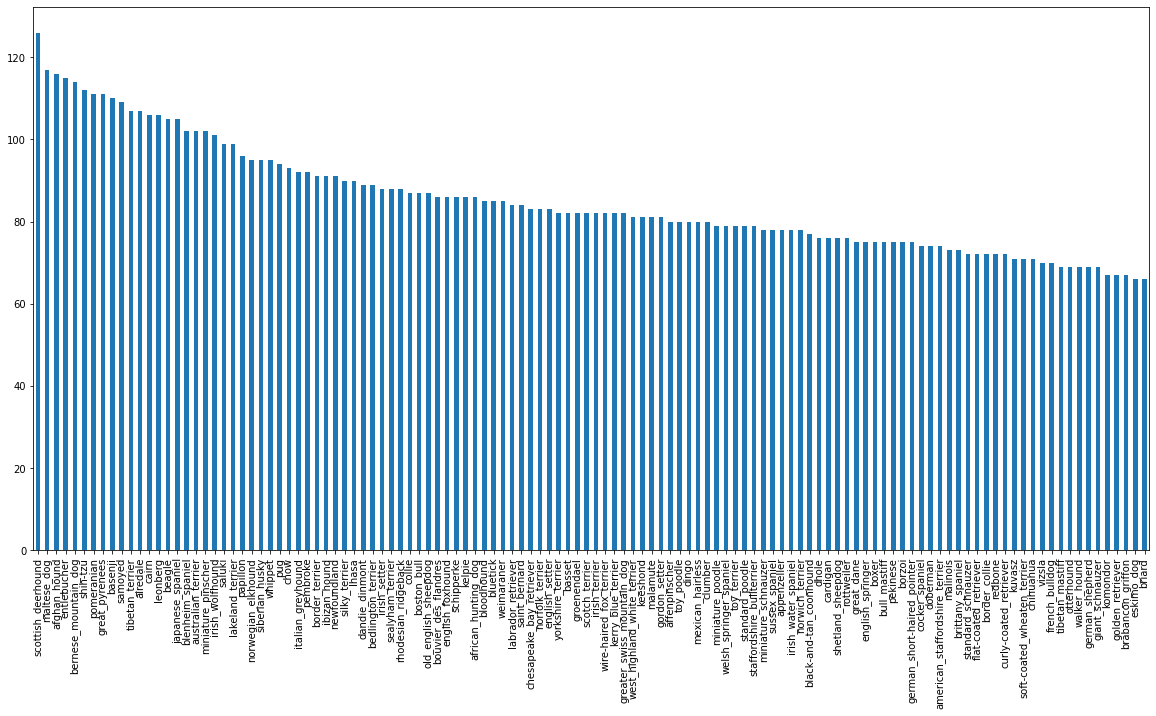

In [ ]:
# How many images are there of each breed ?
labels_csv['breed'].value_counts().plot.bar(figsize=(20, 10));

In [ ]:
labels_csv['breed'].value_counts().median()

82.0

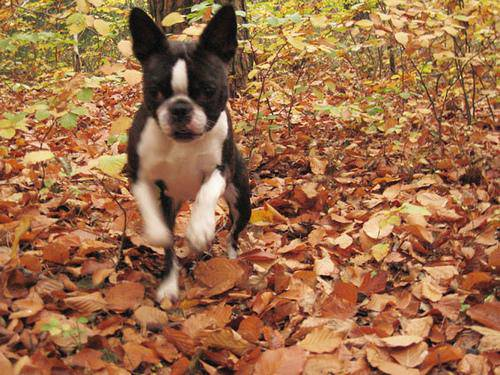

In [ ]:
# Let's view an image

from IPython.display import Image

Image('path to the image/imageID.jpg')

### Getting images and their labels

Get a list of all of our image file pathnames.

In [ ]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
# Create pathnames from imgs IDs

filenames = ['path to folder/train/' + fname + '.jpg' for fname in labels_csv['id']]

# Check the first 10
filenames[:10]

['drive/My Drive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
# Check whether number of filenmase matches number of actual image files
import os
if len(os.listdir('path to folder/train/')) == len(filenames):
  print("Filenames match actual amount of files! Proceed.")
else:
  print("Filenames do not match actual amount of files, check the target directory")

Filenames match actual amount of files! Proceed.


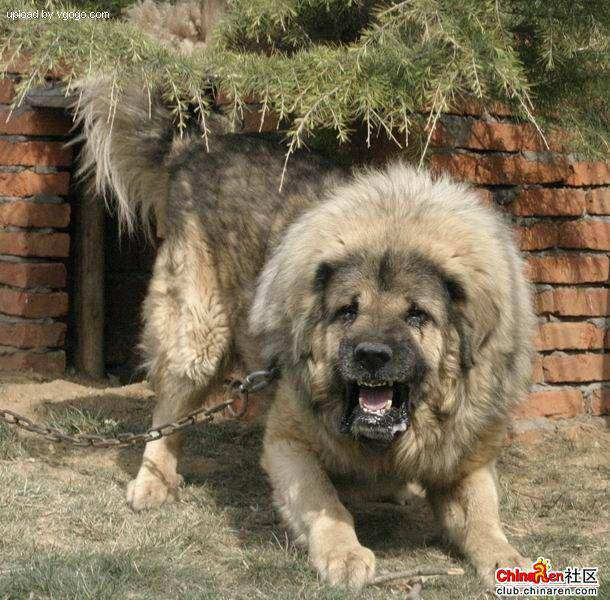

In [ ]:
# One more check

Image(filenames[9000])

In [ ]:
labels_csv['breed'][9000]

'tibetan_mastiff'

Since we've now got our training image filepaths in a list, let's prepare our labels.

In [ ]:
import numpy as np

labels = labels_csv['breed']
labels = np.array(labels)

In [ ]:
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
# See if number of labels matches the number of filenames

if len(labels) == len(filenames):
  print("Number of labels matches number of filenames!")
else:
  print("Number of labels does not match number of filenames")

Number of labels matches number of filenames!


In [ ]:
# Find the unique label values

unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [ ]:
# Turn a single label into a boolean array

print(labels[0])

labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
# Turn every label into a boolean array

boolean_labels = [label == unique_breeds for label in labels]

len(boolean_labels)

10222

In [ ]:
# Example: Turning boolean array into integers

print(labels[0]) # original label
print(np.where(unique_breeds) == labels[0]) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs

boston_bull
False
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


### Creating our own validation set

Since the dataset from Kaggle doesn't come with a validation set, we're going to create our own.

In [ ]:
# Setup X & y variables

X = filenames
y = boolean_labels

We're going to start off experimenting with 1000 images and increase as needed

In [ ]:
# Set number of images to use for experimenting

NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}

In [ ]:
# Let's split our data into train and validation sets

from sklearn.model_selection import train_test_split

# Split them into training and validation of total size NUM_IMAGES

X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [ ]:
# Let's have a geez at the training data

X_train[:2], y_train[:2]

(['drive/My Drive/Dog Vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/My Drive/Dog Vision/train/0d2f9e12a2611d911d91a339074c8154.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, F

### Preprocessing Images (turning images into Tensors)

To preprocess our images into Tensors we're going to write a function which does a few things:

1. Take an image filepath as input
2. Use TensorFlow to read the file and save it to a variable, `image`
3. Turn our `image` (a jpg) into Tensors
4. Normalize our image (convert color channel values from 0-255 to 0-1
5. Resize the `image` to be a shape of (224, 224)
6. Return the modified `image`

In [ ]:
# Convert image to Numpy array

from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [ ]:
image[:2]

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)

In [ ]:
# turn image into tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

In [ ]:
# Define image size
IMG_SIZE = 224

# Create a function for preprocessing images

def process_image(image_path, img_size=IMG_SIZE):
  """
  Takes an image file path and turns the image into a Tensor.
  """
  # Read in an image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 color channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the color channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired value (224, 224)
  image = tf.image.resize(image, size=[img_size, img_size])

  return image

## Turning our data into batches

Why turn out data into batches ?

Let's say you're trying to process 10,000+ images in one go... they all might not fit into memory.

So that's why we do about 32 (batch size) images at a time (you can manually adjust batch size if need be).

In order to use TensorFlow effectively, we need our data in the form of Tensor tuples which look like this:

`(image, label)`.

In [ ]:
# Create a simple function to return a tuple (image, label)

def get_image_label(image_path, label):
  """
  Take an image file path name and the assosciated label,
  processes the image and returns a typle of (image, label)
  """
  image = process_image(image_path)
  return image, label

In [ ]:
# Demo of the above
(process_image(X[42]), tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

Now we've got a way to turn our data into tuples of Tensors in the form: `(image, label)`, let's make a function to turn all of our data (`X` & `y`) into batches.

In [ ]:
# Define the batch size, 32 is a good start

BATCH_SIZE = 32

# Create a function to turn data into batches

def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have labels.
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # only filepaths (no labels)
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # If the data is a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(X))

    # Create (image, label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the traninig data into batches
    data_batch = data.batch(BATCH_SIZE)
    return data_batch

In [ ]:
# Create training and validation data batches

train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [ ]:
# Check out the different attributes of our data batches

train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing Data Batches

Our data is now in batches, however, these can be a little hard to understand, let's visualize them

In [ ]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays a plot of 25 images and their labels from a data batch
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn the grid lines off
    plt.axis('off')

In [ ]:
train_images, train_labels = next(train_data.as_numpy_iterator())

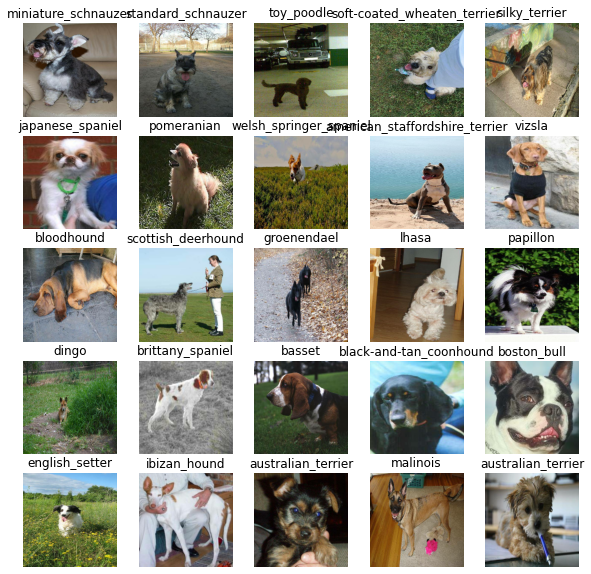

In [ ]:
# Now let's visualize the data in a training batch

show_25_images(train_images, train_labels)

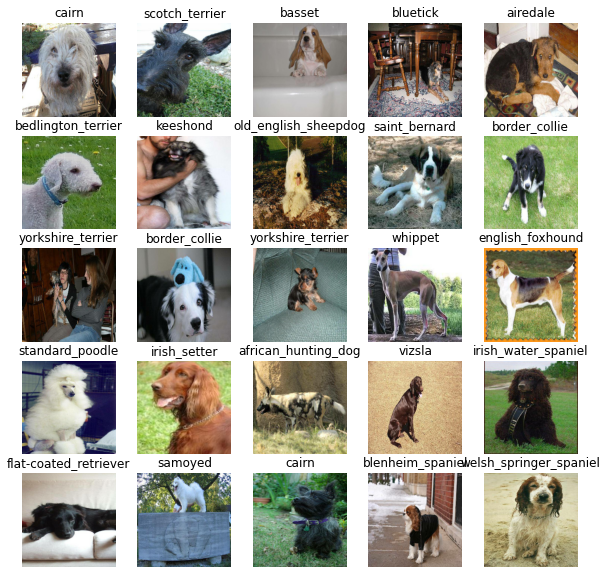

In [ ]:
# Now let's visualize the data in a validation batch

val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

## Building a model

Before we build a model, there are a few things we need to define:
* The input shape (our images shape, in the form of Tensors) to our model.
* The output shape (image labels, in the form of Tensors) of our model.
* The URL of the model we want to use from TensorFlow Hub https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4.

In [ ]:
# Setup input shape to the model

INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, color channels

# Setup output shape of our model

OUTPUT_SHAPE = len(unique_breeds)

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

Now we've got our inputs, outputs and model ready to go. Let's put the together into a Keras deep learning model!

Knowing this, let's create a function which:
* Takes the input shape, output shape and the model we've chosen as parameters.
* Defines the layers in a Keras model in sequential fashion.
* Compiles the model (says how it should be evaluated and improved).
* Builds the model (tells the model the input shape it'll be getting).
* Returns the model.

All of these steps can be found here: https://www.tensorflow.org/guide/keras/sequential_model

In [ ]:
# Create a function which builds a Keras model

def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", model_url)

  # Setup the model layers
  model = tf.keras.Sequential([
      hub.KerasLayer(model_url), # Layer 1 (input layer)
      tf.keras.layers.Dense(units=output_shape,
                            activation='softmax') # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=['accuracy']
  )

  # Build the model

  model.build(input_shape)

  return model

In [ ]:
model = create_model()

model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              5432713   
_________________________________________________________________
dense (Dense)                (None, 120)               120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


## Creating callbacks

Callbacks are helper functions a model can use during training to do such things as save it's progress, check it's progress or stop training early if a model stops improving.

We'll create two callbacks, one for TensorBoard which helps track our models progress and another for early stopping, which prevents our model from training for too long.

### TensorBoard Callback

To setup a TensorBoard callback, we need to do 3 things:

1. Load the TensorBoard notebook extension
2. Create a TensorBoard callback which is able to save logs to a directory and pass it to our model's `fit()` function.
3. Visualize our models training logs with the `%tensorboard` magic function.

In [ ]:
# Load TensorBoard notebook extension
%load_ext tensorboard 

In [ ]:
import datetime

# Create a function to build a TensorBoard callback

def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join('path to the folder/logs',
                          # Make it so the logs get tracked whenever we run an experiment
                         datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

### Early Stopping Callback

Early stopping helps stop our model from overfitting by stopping training if a certain evaluation metric stops improving.

In [ ]:
# Create early stopping callback

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                  patience=3)

## Training a model (on subset of data)

Our first mdoel is only going to train on 1000 images, to make sure everything is working.

In [ ]:
NUM_EPOCHS = 100 #@param {type:'slider', min:10, max:100, step:10}

In [ ]:
# Check to make sure we're still running on a GPU

print("GPU", 'available (YES)' if tf.config.list_physical_devices("GPU") else 'not available')

GPU available (YES)


Let's create a function which trains a model.

* Create a model using `create_model()`
* Setup a TensorBoard callback using `create_tensorboard_callback()`
* Call the `fit()` function on our model passing it the training data, validation data, number of epochs to train for (`NUM_EPOCHS`) and the callbacks we'd like to use
* Return the model

In [ ]:
# Build a function to train and return a trained model

def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
  # Reutnr the fitted model
  return model


In [ ]:
# Fit the model to the data

model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
25/25 [==============================] - 601s 23s/step - loss: 5.0911 - accuracy: 0.0529 - val_loss: 3.3375 - val_accuracy: 0.2650
Epoch 2/100
25/25 [==============================] - 5s 212ms/step - loss: 1.8579 - accuracy: 0.6657 - val_loss: 2.1437 - val_accuracy: 0.4950
Epoch 3/100
25/25 [==============================] - 5s 215ms/step - loss: 0.6055 - accuracy: 0.9299 - val_loss: 1.6610 - val_accuracy: 0.5650
Epoch 4/100
25/25 [==============================] - 5s 212ms/step - loss: 0.2480 - accuracy: 0.9879 - val_loss: 1.4738 - val_accuracy: 0.6000
Epoch 5/100
25/25 [==============================] - 5s 211ms/step - loss: 0.1525 - accuracy: 0.9979 - val_loss: 1.4050 - val_accuracy: 0.5900
Epoch 6/100
25/25 [==============================] - 5s 211ms/step - loss: 0.0979 - accuracy: 1.0000 - val_loss: 1.3625 - val_accuracy: 0.5850
Epoch 7/100
25/25 [==============================

### Checking the TensorBoard logs

The TensorBoard magic function (`%tensorboard`) will access the logs directory we created earlier and visualize it's content.

In [1]:
%tensorboard --logdir drive/My\ Drive/Dog\ Vision/logs  # here you pass the path to the folder again, but this time like a string and with '\' to cancel spaces

UsageError: Line magic function `%tensorboard` not found.


## Making and evaluating predictions using a trained model

In [ ]:
# Make predictions on the validation data (not used to train on)

predictions = model.predict(val_data, verbose=1)
predictions

7/7 [==============================] - 2s 168ms/step


array([[1.50095345e-03, 2.76353938e-04, 4.01021425e-05, ...,
        8.47372634e-04, 2.70494384e-05, 8.20502173e-03],
       [4.95028496e-03, 2.68587202e-04, 6.73308456e-03, ...,
        1.56708935e-03, 2.03781482e-03, 1.45592247e-04],
       [3.39231738e-05, 2.13295702e-04, 4.28475105e-05, ...,
        5.64292481e-04, 4.57192873e-05, 4.39645402e-04],
       ...,
       [8.86666021e-05, 9.29829694e-05, 1.05236222e-05, ...,
        3.97964141e-05, 8.62407542e-05, 1.20220217e-03],
       [1.63500954e-03, 5.25533163e-04, 7.04555059e-05, ...,
        8.16515167e-05, 1.49568441e-05, 3.91336251e-03],
       [3.71420785e-04, 6.03178160e-05, 2.18314421e-03, ...,
        2.21353793e-03, 1.16394396e-04, 2.06241093e-04]], dtype=float32)

In [ ]:
predictions.shape

(200, 120)

In [ ]:
predictions[0]

array([1.50095345e-03, 2.76353938e-04, 4.01021425e-05, 5.47103875e-04,
       1.04010408e-03, 8.83689718e-05, 1.04176693e-01, 2.65059381e-04,
       2.00071416e-04, 3.89001332e-04, 1.02784147e-03, 7.10472668e-05,
       6.41442195e-04, 2.11735882e-04, 8.30283097e-04, 5.38431224e-04,
       4.58175724e-04, 8.52395222e-02, 4.16885377e-05, 2.23358045e-04,
       9.58930119e-04, 7.28793442e-04, 7.48092207e-05, 1.21518108e-03,
       4.64907673e-04, 1.89731159e-04, 1.68973997e-01, 3.61694052e-04,
       3.92948568e-04, 9.85612394e-04, 3.35095065e-05, 7.71166349e-04,
       1.41673186e-03, 1.28700613e-05, 3.41933395e-04, 3.30851413e-02,
       2.30197875e-05, 4.30206739e-04, 1.49764266e-04, 1.68282233e-04,
       3.52903618e-03, 9.93060803e-06, 1.31844470e-04, 1.78191040e-04,
       4.05743922e-05, 5.27016644e-04, 1.03935781e-05, 4.43754630e-04,
       3.20793153e-03, 8.48041207e-04, 2.57151696e-04, 1.99853712e-05,
       8.14234838e-04, 1.38888601e-04, 8.97122663e-04, 3.21290951e-04,
      

In [ ]:
np.sum(predictions[0])

0.9999999

In [ ]:
# First prediction

index = 134

print(predictions[index])
print(f"Max value (probability of prediction): {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_breeds[np.argmax(predictions[index])]}")

[7.99891248e-04 4.83528274e-05 2.69149314e-04 5.16999789e-05
 1.86415244e-04 2.87398696e-04 3.60793965e-05 1.71016945e-04
 6.02200744e-04 2.80291162e-04 3.47003224e-05 1.34920340e-03
 2.25770782e-04 3.47203352e-02 7.74587170e-06 1.06245185e-04
 1.09659792e-04 3.66714048e-05 6.12128992e-04 1.11181536e-04
 4.03948885e-04 4.75223787e-04 9.53764466e-05 6.39793754e-04
 3.92375551e-02 3.12979573e-05 1.57133982e-05 1.40338510e-04
 3.42549145e-04 8.36404615e-06 3.11351469e-05 9.45810461e-04
 1.43851343e-04 1.49177999e-04 1.59325675e-04 7.63732314e-05
 7.27176957e-05 4.57592159e-06 1.04911241e-03 1.58651127e-03
 1.77992461e-03 5.28079516e-04 4.97413217e-04 5.45763833e-05
 4.32009052e-04 1.11490681e-05 3.98724660e-05 4.53158224e-04
 2.52577611e-05 4.38964344e-04 1.49260333e-03 1.45417353e-05
 1.09975554e-04 3.67804518e-04 4.11774854e-05 1.13048984e-04
 1.07012745e-02 1.74554676e-04 7.87275712e-05 1.60103627e-05
 2.21868777e-06 2.74674356e-04 2.34986442e-06 3.96042306e-05
 1.96974855e-04 8.605909

Having the above functionality is great but we want to be able to do it at scale.

And it would be even better if we could see the image the predictions is being made on.

**Note**: Prediction probabolities are also known as confidence levels.

In [ ]:
# Turn prediction probabilities into their respective label (easier to understand)

def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """

  return unique_breeds[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities

pred_label = get_pred_label(predictions[5])
pred_label

'bedlington_terrier'

Now since our validation data is still in a batch dataset, we'll hav eto unbatchify it to make predictions on the validation images and then compare those predictions to the validation labels (truth labels).

In [ ]:
# Create a function to unbatch a batch dataset

def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and returns separate arrays of images and labels.
  """
  images = []
  labels = []

  # Loop through unbatched data

  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

# Unbatchify the validation data

val_images, val_labels = unbatchify(val_data)

val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.2770141 , 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [ ]:
get_pred_label(val_labels[50])

'affenpinscher'

In [ ]:
get_pred_label(predictions[50])

'american_staffordshire_terrier'

Now we've got wayt to get:
* Prediction labels
* Validation labels (truth labels)
* Validation images

Let's make some function to make these all a bit more visualize.

We'll create a function which:

* Takes an array of prediction probabilities, an array of truth labels and an array of images and an integer.
* Convert the prediction probabilities to a predicted label.
* Plot the predicted label, it's predicted probability, the truth label and the target image on a single plot.

In [ ]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth and image for sample n
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get the pred label
  pred_label = get_pred_label(pred_prob)

  # Plot image and remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the color of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color="red"

  # Change plot title to be predicted, probability of prediction and truth label
  plt.title(f"{pred_label} {np.max(pred_prob)*100:2.0f}% {true_label}", color=color)

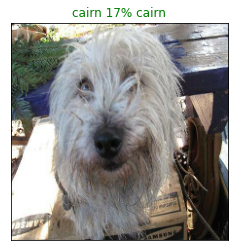

In [ ]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=0)

Now we've got one function to visualize our models top prediction, let's make another to view our models top 10 predictions.

This function will:
* Take an imput of prediction probabilities array and a ground truth array and an integer
* Find the prediction using `get_pred_label()`
* Find the top 10:
  * Prediction probabilities indexes
  * Prediction probabilities values
  * Prediction labels
* Plot the top 10 prediction probability values and labels, coloring the true label green

In [ ]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plot the top 10 highest prediction confidences along with the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[::-1][:10]

  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]

  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color='grey')
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels = top_10_pred_labels,
             rotation='vertical')
  
  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

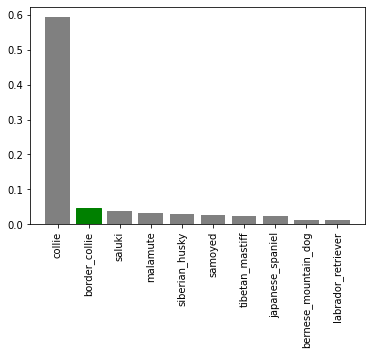

In [ ]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

Now we've got some function to help us visualize our predictions and evaluate our model, let's check out a few.

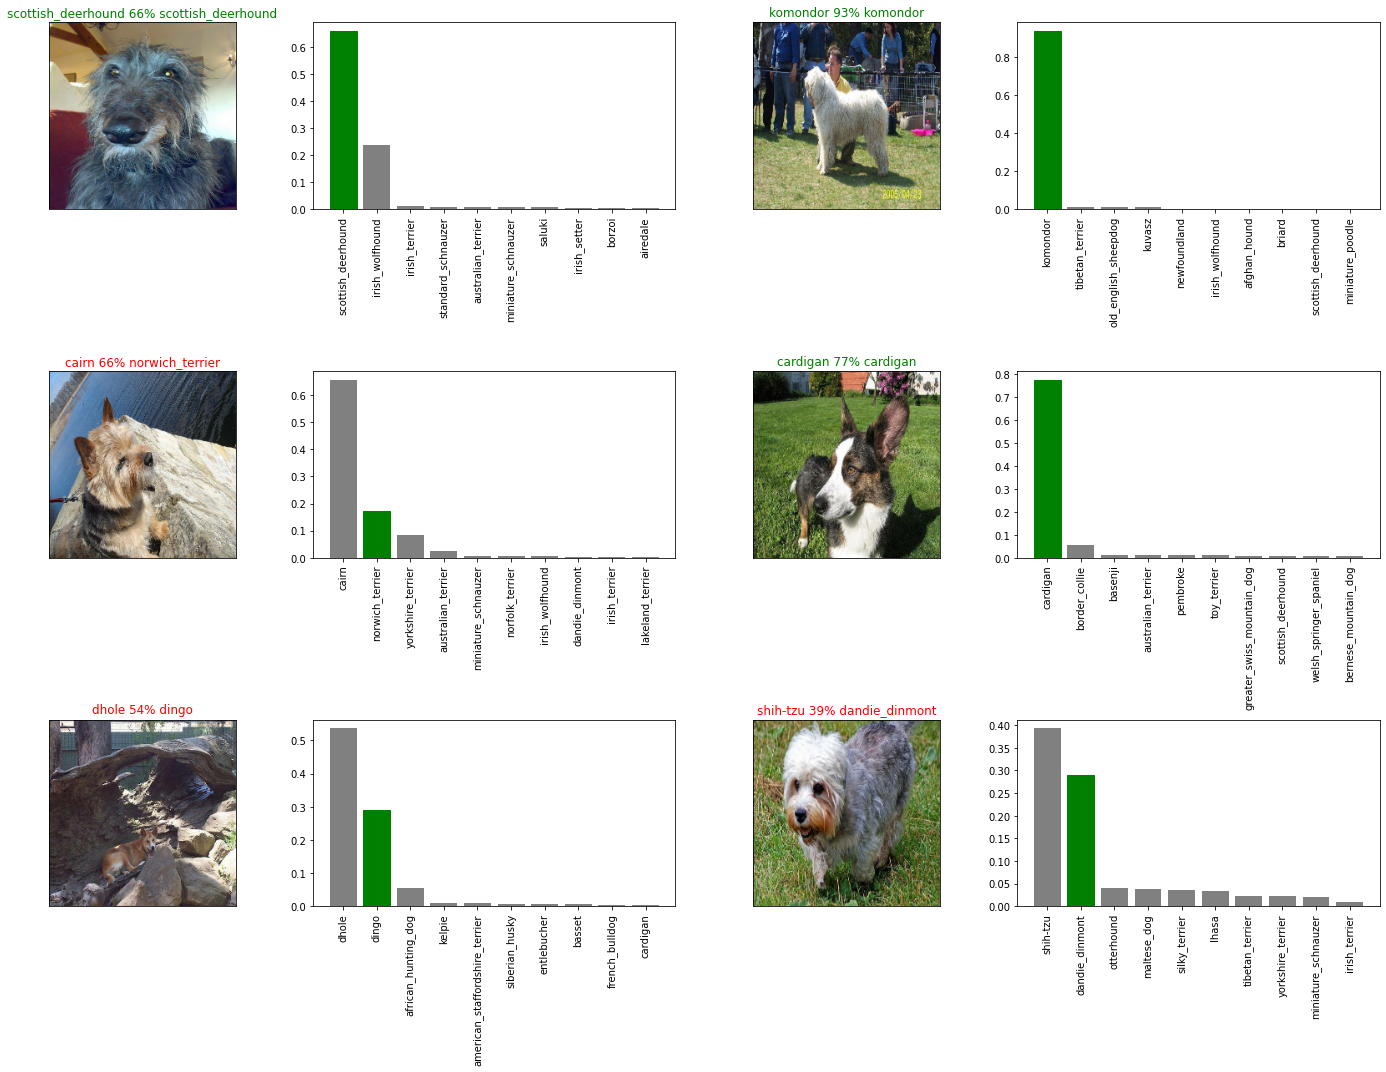

In [ ]:
# Let's check out a few predictions and their different values
i_multiplier = 25
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels=val_labels,
                 n=i+i_multiplier)
  plt.tight_layout()

plt.tight_layout(h_pad=1.0)
plt.show()

## Saving and reloading a trained model

In [ ]:
# Create a function to save a model

def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (string)
  """
  # Create a model directory pathname with current time
  modeldir = os.path.join('drive/My Drive/Dog Vision/models',
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  
  model_path = modeldir + '-' + suffix + '.h5' # Save format of model

  print(f'Saving model to: {model_path}...')
  model.save(model_path)
  return model_path

In [ ]:
# Create a function to load a trained model

def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f'Loading saved model from: {model_path}...')
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer": hub.KerasLayer})
  
  return model

Now we've got functions to save and load a trained model, let's make sure they work!

In [ ]:
# Save our model trained on 1000 images
save_model(model, suffix="1000-images-mobilenetv2-Adam")

Saving model to: drive/My Drive/Dog Vision/models/20210329-08271617006466-1000-images-mobilenetv2-Adam.h5...


'drive/My Drive/Dog Vision/models/20210329-08271617006466-1000-images-mobilenetv2-Adam.h5'

In [ ]:
# Load a trained model

loaded_1000_image_model = load_model("drive/My Drive/Dog Vision/models/20210326-11371616758635-1000-images-mobilenetv2-Adam.h5")

Loading saved model from: drive/My Drive/Dog Vision/models/20210326-11371616758635-1000-images-mobilenetv2-Adam.h5...


In [ ]:
# Evfaluate the pre-saved model

model.evaluate(val_data)

7/7 [==============================] - 1s 147ms/step - loss: 1.2769 - accuracy: 0.6050


[1.2769275903701782, 0.6050000190734863]

In [ ]:
# Evaluate the loaded model

loaded_1000_image_model.evaluate(val_data)

7/7 [==============================] - 2s 148ms/step - loss: 1.2296 - accuracy: 0.6850


[1.2295920848846436, 0.6850000023841858]

## Training a big dog model (on the full data)

In [ ]:
# Create a data batch with the full data set
full_data = create_data_batches(X, y)

Creating training data batches...


In [ ]:
# Create a model for full model

full_model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [ ]:
 # Create full model callbacks
 full_model_tensorboard = create_tensorboard_callback()

 # No validation set when training on all the data, so we can't monitor validation accuracy
 full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy')

In [ ]:
# Fit the full model to the full data

full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 5884s 18s/step - loss: 2.3489 - accuracy: 0.4903
Epoch 2/100
320/320 [==============================] - 54s 170ms/step - loss: 0.3946 - accuracy: 0.8889
Epoch 3/100
320/320 [==============================] - 54s 169ms/step - loss: 0.2266 - accuracy: 0.9409
Epoch 4/100
320/320 [==============================] - 53s 167ms/step - loss: 0.1377 - accuracy: 0.9695
Epoch 5/100
320/320 [==============================] - 53s 166ms/step - loss: 0.0990 - accuracy: 0.9816
Epoch 6/100
320/320 [==============================] - 53s 164ms/step - loss: 0.0702 - accuracy: 0.9911
Epoch 7/100
320/320 [==============================] - 53s 165ms/step - loss: 0.0554 - accuracy: 0.9926
Epoch 8/100
320/320 [==============================] - 53s 165ms/step - loss: 0.0428 - accuracy: 0.9944
Epoch 9/100
320/320 [==============================] - 53s 164ms/step - loss: 0.0330 - accuracy: 0.9972
Epoch 10/100
320/320 [==============================] - 52s 163m

In [ ]:
# save_model(full_model, suffix='full_image_dataset_mobilenetv2_Adam')

Saving model to: drive/My Drive/Dog Vision/models/20210329-10311617013895-full_image_dataset_mobilenetv2_Adam.h5...


'drive/My Drive/Dog Vision/models/20210329-10311617013895-full_image_dataset_mobilenetv2_Adam.h5'

In [ ]:
full__completed_model = load_model('path to the model/models/20210326-18311616783519-full_image_dataset_mobilenetv2_Adam.h5')

Loading saved model from: drive/My Drive/Dog Vision/models/20210326-18311616783519-full_image_dataset_mobilenetv2_Adam.h5...


## Making predictions on the test dataset

Since our model has been trained on images in the form of Tensor batches, to make predictions on the test data, we'll have to get it into the same format.

We created `create_data_batches()` which can take a list of filenames as input and convert them into Tensor batches

To make predictions on the test data, we'll:
* Get the test image filenames
* Convert the filenames into test data batches using `create_data_batches()` and setting the `test_data` parameter to `True` (since the test data doesn't have labels).
* Make a predictions array by passing the test batches to `predict()` method called on our model.

In [ ]:
# Load test image filenames
test_path = "path to test dataset/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['drive/MyDrive/Dog Vision/test/ddf4f1d39b7ebc610ff479396cd9c6fc.jpg',
 'drive/MyDrive/Dog Vision/test/e06ce40d62d3d198f2df70349104a002.jpg',
 'drive/MyDrive/Dog Vision/test/e6d6ff5b33e6174158d5ab05a7eda95c.jpg',
 'drive/MyDrive/Dog Vision/test/e200fe397f6ca5d626210830fc38aca9.jpg',
 'drive/MyDrive/Dog Vision/test/e22d81ccf32bd590d8dd66815fd222b7.jpg',
 'drive/MyDrive/Dog Vision/test/dddb2b191e1b1de4867f6f5e81236312.jpg',
 'drive/MyDrive/Dog Vision/test/e46f65254fdf01d5fe732068c844efbd.jpg',
 'drive/MyDrive/Dog Vision/test/e65d6492c026c925660d80543664b8a7.jpg',
 'drive/MyDrive/Dog Vision/test/e4c49d7e028965d3504b0862633464c3.jpg',
 'drive/MyDrive/Dog Vision/test/e36ec4ab8218060660ec82fd6c4757a7.jpg']

In [ ]:
len(test_filenames)

10357

In [ ]:
# Create test data batch

test_data = create_data_batches(test_filenames, test_data=True)

Creating test data batches...


In [ ]:
test_data

<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

In [ ]:
# Make predictions on test data batch using the loaded full model

 test_predictions = full__completed_model.predict(test_data,
                                                  verbose=1)

324/324 [==============================] - 6610s 20s/step


In [ ]:
# Save predictions t ocsv file (for access later)
 np.savetxt('path to folder where you want to save it/preds_array.csv', test_predictions, delimiter=',')

In [ ]:
test_predictions_loaded = np.loadtxt('path to folder where you saved it/preds_array.csv', delimiter=',')

In [ ]:
test_predictions_loaded[:10]

array([[1.15551768e-06, 1.82145832e-09, 2.35095623e-08, ...,
        1.77264301e-04, 6.79399363e-07, 1.58331753e-03],
       [4.20876546e-07, 2.22296694e-05, 3.06284029e-08, ...,
        3.45114290e-06, 2.15390082e-06, 1.39274112e-08],
       [4.84418394e-10, 2.14715357e-08, 5.14016303e-12, ...,
        2.61384785e-11, 6.84688417e-12, 4.24045673e-13],
       ...,
       [7.22820637e-10, 1.71153658e-06, 7.90481772e-06, ...,
        3.73753050e-04, 4.59631792e-07, 1.84654159e-08],
       [2.23185737e-08, 9.59276569e-09, 1.71918216e-10, ...,
        3.12497493e-11, 7.50817378e-07, 1.18244236e-06],
       [8.56673343e-11, 4.83060830e-07, 4.90073315e-10, ...,
        2.32766169e-07, 5.51968014e-07, 2.83574247e-10]])

## Preparing test dataset predictions for Kaggle

Ou models prediction probability outputs in a DataFrame with and ID and a column for each different dog breed.

https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

To get the data in this format, we'll:
* Create a pandas DataFrame with an ID column as well as a column for each dog breed.
* Add data to the ID column by extracting the test image ID's from their filepaths.
* Add data (the predictions probabilities) to each of the dog breed columns.
* Export the DataFrame as a CSV to submit it to Kaggle.

In [ ]:
# Create a pandas DataFrame with empty columns

preds_df = pd.DataFrame(columns=['id'] + list(unique_breeds))
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier


In [ ]:
# Append test image ID's to predictions DataFrame

test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]

In [ ]:
test_ids[:10]

['ddf4f1d39b7ebc610ff479396cd9c6fc',
 'e06ce40d62d3d198f2df70349104a002',
 'e6d6ff5b33e6174158d5ab05a7eda95c',
 'e200fe397f6ca5d626210830fc38aca9',
 'e22d81ccf32bd590d8dd66815fd222b7',
 'dddb2b191e1b1de4867f6f5e81236312',
 'e46f65254fdf01d5fe732068c844efbd',
 'e65d6492c026c925660d80543664b8a7',
 'e4c49d7e028965d3504b0862633464c3',
 'e36ec4ab8218060660ec82fd6c4757a7']

In [ ]:
preds_df['id'] = test_ids

preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,ddf4f1d39b7ebc610ff479396cd9c6fc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,e06ce40d62d3d198f2df70349104a002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,e6d6ff5b33e6174158d5ab05a7eda95c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,e200fe397f6ca5d626210830fc38aca9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,e22d81ccf32bd590d8dd66815fd222b7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Add the prediction probabilities to each dog breed column
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,ddf4f1d39b7ebc610ff479396cd9c6fc,1.15552e-06,1.82146e-09,2.35096e-08,9.07859e-09,3.5869e-09,1.43342e-05,6.02682e-06,0.0664109,5.38896e-06,2.81594e-05,2.30087e-07,1.0199e-05,1.89603e-07,9.12248e-07,7.20316e-07,0.00660995,1.97041e-05,1.22601e-05,2.3673e-07,1.50786e-07,1.69931e-06,9.06153e-10,2.6791e-06,4.56354e-10,1.73887e-05,1.20813e-08,3.38177e-06,0.0218274,5.09311e-05,0.00138042,1.73908e-07,1.42048e-10,4.97857e-06,3.85197e-05,4.68247e-07,1.33106e-06,3.0693e-08,2.32512e-06,4.93169e-09,...,0.041987,1.59527e-08,2.11243e-07,1.22345e-08,5.41809e-06,2.97797e-06,9.48955e-06,1.54136e-08,0.0545758,0.0130073,1.74863e-08,1.69858e-09,1.68152e-06,2.29105e-05,1.39896e-06,6.45756e-07,5.00822e-07,1.13171e-06,4.93572e-09,2.76433e-06,0.0035369,0.000115206,3.04615e-06,2.3901e-06,3.14282e-05,0.000182402,5.03401e-08,7.53711e-08,1.29937e-06,0.000119449,9.71137e-05,0.000796132,5.07966e-09,2.88646e-08,0.000333413,4.63476e-05,6.54267e-06,0.000177264,6.79399e-07,0.00158332
1,e06ce40d62d3d198f2df70349104a002,4.20877e-07,2.22297e-05,3.06284e-08,1.18359e-05,5.07364e-07,0.598295,3.13568e-08,1.20853e-05,5.10503e-07,5.3239e-08,6.07487e-08,0.337599,1.62277e-06,1.14939e-06,1.36447e-07,7.06247e-06,1.44104e-07,2.19344e-08,9.17303e-06,2.09371e-06,4.95288e-08,7.05752e-09,1.44339e-07,6.4136e-08,9.92598e-06,2.91592e-08,1.79215e-08,5.25489e-06,1.52641e-07,8.78458e-07,2.2681e-08,4.37793e-09,1.88474e-06,0.000150846,8.26291e-08,4.89479e-09,8.328e-07,1.50401e-09,1.83615e-05,...,1.20337e-07,4.11404e-07,1.23559e-05,6.47262e-06,1.86641e-05,6.35319e-05,1.84326e-05,8.0151e-06,6.5835e-08,1.68789e-07,4.90942e-06,1.4993e-05,1.55616e-05,0.000269301,8.40049e-06,2.79406e-07,6.66156e-08,2.50355e-07,5.46604e-11,0.00377187,4.07474e-08,4.51306e-07,8.46075e-08,7.41279e-08,9.65705e-08,5.15738e-08,1.76673e-08,3.21684e-08,1.95194e-05,0.000217497,6.1649e-08,5.54884e-09,1.31774e-09,0.000551885,2.59087e-08,3.29396e-05,1.84962e-07,3.45114e-06,2.1539e-06,1.39274e-08
2,e6d6ff5b33e6174158d5ab05a7eda95c,4.84418e-10,2.14715e-08,5.14016e-12,4.5785e-11,2.67883e-10,6.92433e-12,4.6785e-09,1.29145e-12,4.26288e-11,4.89929e-10,6.21353e-10,1.29515e-10,1.0061e-09,1.58833e-08,2.10138e-10,7.93818e-11,6.63202e-10,1.11157e-10,3.25326e-07,1.78128e-12,2.60637e-12,1.68975e-11,6.12105e-12,4.63556e-12,4.33723e-08,3.99676e-09,1.20452e-12,1.18292e-10,7.5944e-08,1.87927e-12,1.17631e-10,6.55898e-07,5.66184e-09,6.0425e-12,6.2037e-07,7.53444e-10,1.10349e-09,6.76978e-09,1.59239e-11,...,1.03489e-11,4.11732e-11,1.02954e-09,8.30138e-09,3.42579e-12,3.99219e-09,1.78198e-12,4.07008e-12,1.20719e-09,2.2128e-09,1.44516e-09,1.61966e-09,6.08546e-09,1.05786e-08,3.23663e-09,3.28105e-12,4.9309e-11,1.14403e-09,8.52561e-08,1.50831e-08,8.17442e-11,1.1761e-09,1.97617e-12,1.97987e-11,1.03846e-11,8.09487e-08,1.97429e-12,6.30619e-08,5.86554e-09,3.92596e-11,8.73495e-11,1.53852e-13,1.10325e-12,6.55951e-08,4.08486e-11,7.28808e-11,2.29723e-12,2.61385e-11,6.

In [ ]:
# Save our predictions DataFrame to CSV for submission to Kaggle
preds_df.to_csv('path to where to save it/full_model_predictions_submission_1_mobilenetV2.csv',
                 index=False)

## Making predictions on custom images

To make predictions on custom images, we'll:
* Get the filepaths of our own images.
* Turn the filepaths into data batches using `create_data_batches()`. And since our custom images won't have labels, we set the `test_data` parameter to `True`.
* Pass the custom image data batch to our model's `predict()` method.
* Convert the prediction output probabilities to predictions labels.
* Compare the predicted labels to the custom images.


In [ ]:
# Get custom image filepaths

custom_path = 'custom path to images/'
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

In [ ]:
custom_image_paths

['drive/My Drive/Dog Vision/dogs/golden-retriever-royalty-free-image-506756303-1560962726.jpg',
 'drive/My Drive/Dog Vision/dogs/images.jpg',
 'drive/My Drive/Dog Vision/dogs/rottweiler-dogs-puppies-1.jpg']

In [ ]:
# Turn custom images into batches

custom_data = create_data_batches(custom_image_paths, test_data=True)
custom_data

Creating test data batches...


<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

In [ ]:
# Make predictions on the custom data

custom_preds = full_model.predict(custom_data)

In [ ]:
custom_preds.shape

(3, 120)

In [ ]:
# Get custom image prediction labels

custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]

custom_pred_labels

['golden_retriever', 'english_foxhound', 'rottweiler']

In [ ]:
# Get custom images (our unbatchify() function won't work since there aren't labels)

custom_images = []

# Loop through unbatched data

for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

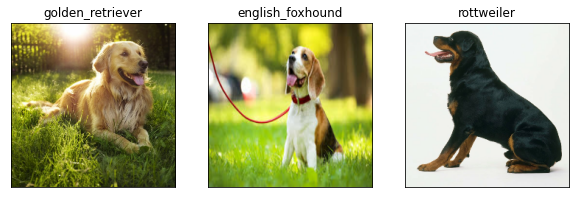

In [ ]:
# Check custom image predictions
plt.figure(figsize=(10, 10))
for i, image in enumerate(custom_images):
  plt.subplot(1, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)